我们的目标是能够自动的去同步共享资源里的新增部分，所以我们要遍历共享文件夹里的每一个文件，并判断是否需要同步到网盘里。


## 遍历文件夹（递归函数）

回想一下上一节的内容，我们已经用`get_share_file_list（）`查看每一个分享资源下的所有文件了，并且也可以知道每一个文件的类型，那如果是文件夹的话，我们就可以进入到里面，再把所有的文件信息获取出来。

但问题是，如果文件夹下面还有文件夹，文件夹里还有文件夹呢，这个遍历所有文件夹的方法应该如何实现？

同样的，我们还是先看看官方的案例:

```python
all_files = []

def tree_share(share_id, share_token, parent_file_id='root'):
    file_list = ali.get_share_file_list(share_id, share_token, parent_file_id=parent_file_id)
    for file in file_list:
        print(file.name)
        all_files.append(file)
        if file.type == 'folder':
            tree_share(share_id, share_token, file.file_id) # 在tree_share内部调用自己


share_id = '<填写 share_id>'
share_token = ali.get_share_token(share_id)
tree_share(share_id, share_token)
```

可以看到`tree_share（）`很特别，在`tree_share（）`里面还调用了一次自己，这种用法叫做[递归函数](https://www.liaoxuefeng.com/wiki/1016959663602400/1017268131039072)。  

之前，我没有提到这种用法的原因是，我们很少在自己编程的时候用到这个技巧。

而且，这个技巧掌握起来不容易，就像俄罗斯套娃，如果没有考虑明白，很容易就会陷入到一种逻辑黑洞里。

在这里，是一个很好的场景来介绍如何使用递归。

如下图所示：

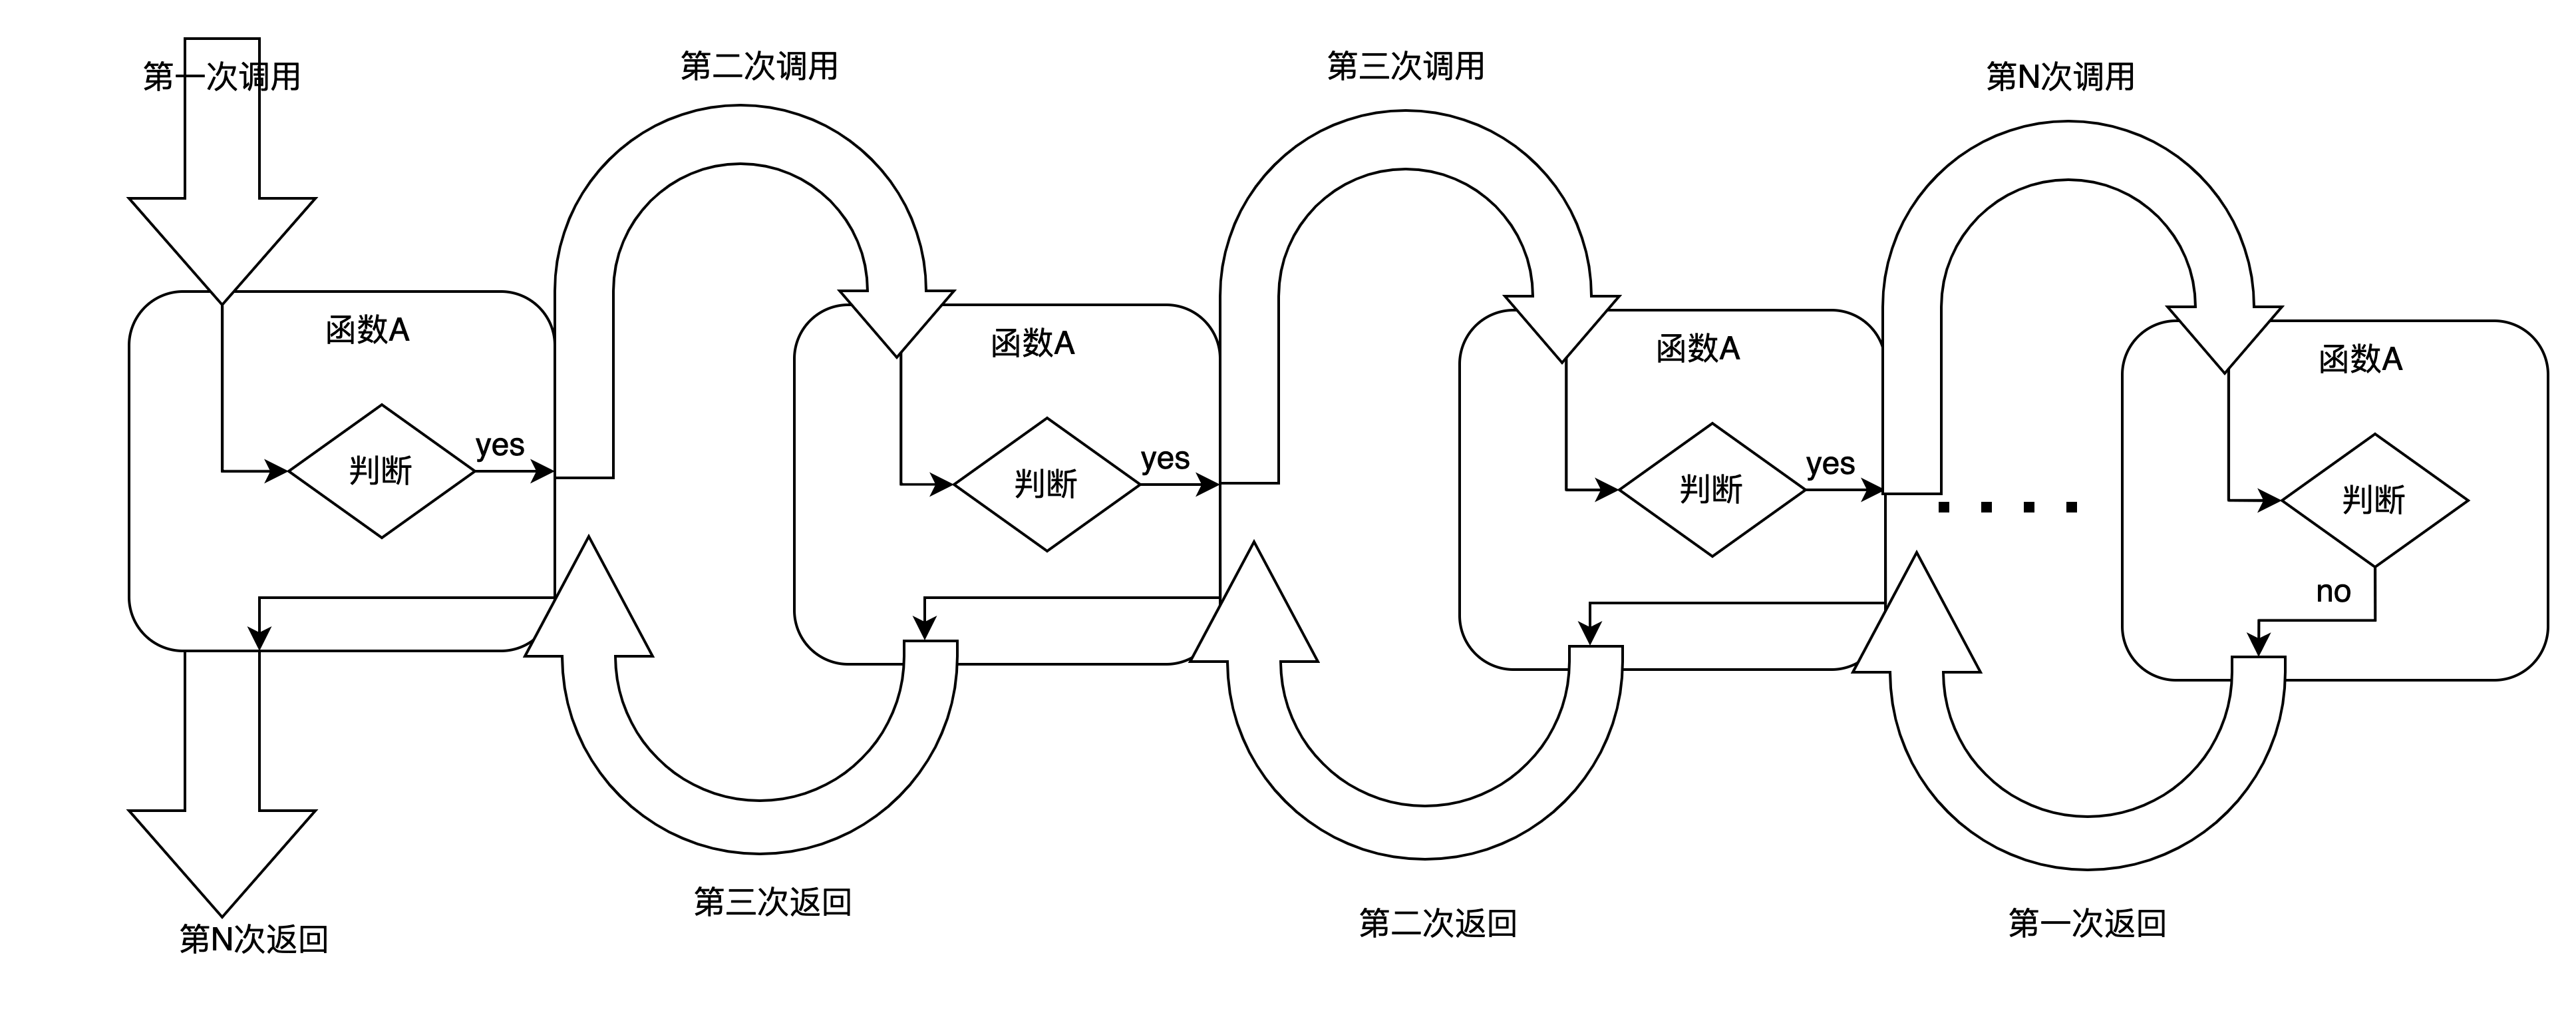

当第一次调用递归函数时，函数内部会有判断，判断是否还需要继续调用递归函数处理。

如果需要，就会重新整理一下需要处理的入参，然后调用下一级递归函数，在下一级递归函数中，同样要进行一个判断，看看是否还需要进行递归。

而到了最后一级，肯定会进入一个不需要继续调用的判断结果，从而返回到上一级递归函数中，上一级函数完成后继续返回其上一级，以此类推，完成整个递归过程。

总结来说，因为递归函数的实现就是一个函数，所以无论哪一级的逻辑都是一样的，但其内部一般都会有一个判断，用来判断是继续递归还是直接退出。并且我们要在逻辑里想明白，肯定要有一个情况能满足这个退出的判断，否则就会无限递归下去，无穷无尽。

好的，让我们试试官方的这段代码是否能完成我们的需求吧

In [ ]:
from aligo import Aligo
import logging

ali = Aligo(level = logging.ERROR)

all_files = []

def tree_share(share_id, share_token, parent_file_id='root'):
    file_list = ali.get_share_file_list(share_id, share_token, parent_file_id=parent_file_id)
    for file in file_list:
        print(file.name)
        all_files.append(file)
        if file.type == 'folder':
            tree_share(share_id, share_token, file.file_id) # 在tree_share内部调用自己

share_msg='''
👇👇👇您所获取的链接👇👇👇
https://www.aliyundrive.com/s/XsKj3F3HTSA
'''
            
r = ali.share_link_extract_code(share_msg)
print(r.share_id, r.share_pwd)
share_token = ali.get_share_token(r.share_id)
tree_share(r.share_id, share_token)

## 练习

可以看到，官方这段代码把分享链接里面所有的内容都打印出来了，但是比较可惜，打印的结构没有办法很直观的展示文件层级结构。

虽然这个打印对我们处理逻辑不影响，但是打印的好看点，对使用者来说也是一种良好的体验。

接下来你可以动手试试看，能不能把层级结构展示出来。

如下所示：
```
X《縣委大院》共24集
├─4K高码
│  ├─14 4K高码.mp4
│  ├─13 4K高码.mp4
│  ├─12 4K高码.mp4
│  ├─11 4K高码.mp4
│  ├─10 4K高码.mp4
│  ├─09 4K高码.mp4
│  ├─08 4K高码.mp4
│  ├─07 4K高码.mp4
│  ├─06 4K高码.mp4
│  ├─05 4K高码.mp4
│  ├─04 4K高码.mp4
│  ├─03 4K高码.mp4
│  ├─02 4K高码.mp4
│  └─01 4K高码.mp4
├─4KHDR
│  ├─县委大院.S01E14.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E13.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E12.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E11.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E10.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E09.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E08.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E07.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4.mp4
│  ├─县委大院.S01E06.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
│  ├─县委大院.S01E05.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
│  ├─县委大院.S01E04.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
│  ├─县委大院.S01E03.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
│  ├─县委大院.S01E02.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
│  └─县委大院.S01E01.2022.2160p.WEB-DL.H265.HDR.DDP5.1-HHWEB.mp4
├─4K
│  ├─14.mp4
│  ├─13.mp4
│  ├─12.mp4
│  ├─11.mp4
│  ├─10（1）.mp4
│  ├─10.mp4
│  ├─09.mp4
│  ├─08.mp4
│  ├─07.mp4
│  ├─06.mp4
│  ├─05.mp4
│  ├─04.mp4
│  ├─03.mp4
│  ├─02.mp4
│  └─01.mp4
├─追剧日历.png
├─14.mp4
├─13.mp4
├─12.mp4
├─11.mp4
├─10.mp4
├─09.mp4
├─08.mp4
├─07.mp4
├─06.mp4
├─05.mp4
├─04.mp4
├─03.mp4
├─02.mp4
└─01.mp4
```

（提示：其实就是根据当前所处的位置，在每个文件名的前面加一个特定的字符串，如果是文件夹内的文件（进入下一层递归），就开头多空两格，并且调整一下特定字符串的形式）

In [ ]:
all_files = []

# 用 prefix 来指定特定的字符串
def pretty_tree_share(share_id, share_token, parent_file_id='root',prefix=''):
    file_list = ali.get_share_file_list(share_id, share_token, parent_file_id=parent_file_id)
    
    #需要判断一下 当前文件夹内的最后一个文件，做特殊的字符串处理
    count = 0
    last_one = False
    
    for file in file_list:
        count +=1
        if count==len(file_list):
            '''
            如果是最后一个文件,对prefix做些调整
            pf = ''
            '''
            pass
        else :
            '''
            否则
            pf = ''
            '''
            pass
        
        all_files.append(pf + file.name)   
        print(pf + file.name)
        
        
        if file.type == 'folder':
            '''
            如果是文件夹，那下一次遍历的文件夹所以内容的开头都需要多打印一些内容，也许还需要修订些内容
            npf = ''
            '''
            pretty_tree_share(share_id, share_token, parent_file_id=file.file_id,prefix=npf)

            


In [ ]:
url = "https://www.aliyundrive.com/s/XsKj3F3HTSA"
r = ali.share_link_extract_code(url)
share_token = ali.get_share_token(r.share_id)
pretty_tree_share(r.share_id, share_token)

另外，你如果对递归函数感兴趣，可以看一下[廖雪峰老师的最后习题](https://www.liaoxuefeng.com/wiki/1016959663602400/1017268131039072)，能做出来也不简单。

>[汉诺塔](https://baike.baidu.com/item/汉诺塔/3468295)的移动可以用递归函数非常简单地实现。
>
>请编写move(n, a, b, c)函数，它接收参数n，表示3个柱子A、B、C中第1个柱子A的盘子数量，然后打印出把所有盘子从A借助B移动到C的方法，例如：

In [ ]:
def move(n, a, b, c):
    if n == 1:
        print(a, '-->', c)
        
        

move(3, 'A', 'B', 'C')
# 期待输出:
# A --> C
# A --> B
# C --> B
# A --> C
# B --> A
# B --> C
# A --> C